In [129]:
!pip install pandas matplotlib seaborn scikit-learn

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [131]:
# Funcion para generar matrices de confusion con entrada matriz
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, fontsize=16)
    plt.yticks(tick_marks, classes, fontsize=16)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.tight_layout()
    plt.savefig(f'../../documento/figure/{title.replace(" ", "_").lower()}-results.pdf', bbox_inches='tight')

In [132]:
def get_support_from_cm(cm):
    return cm.sum(axis=1)

In [133]:
def get_metrics_from_cm(cm):
    # Should return macro and weighted metrics: accuracy and f1 
    from sklearn.metrics import accuracy_score, f1_score
    y_true = []
    y_pred = []
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            y_true += [i] * cm[i, j]
            y_pred += [j] * cm[i, j]
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    return {'accuracy': accuracy, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted}

## mDeBERTa V3

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import json

In [135]:
results = json.load(open('../../models/classification/mdeberta_lr2e-05_ep3_bs8x4_20251010_200718/test_predictions.json'))

In [136]:
print(f"F1-score: {f1_score(results['labels'], results['predictions'], average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(results['labels'], results['predictions']):.4f}")

F1-score: 0.5335
Accuracy: 0.5470


In [137]:
cm = confusion_matrix(results['labels'], results['predictions'])

In [138]:
get_metrics_from_cm(cm)

{'accuracy': 0.547,
 'f1_macro': 0.5285340949448321,
 'f1_weighted': 0.5335256942814176}

In [139]:
get_support_from_cm(cm)

array([160, 180, 200, 220, 240])

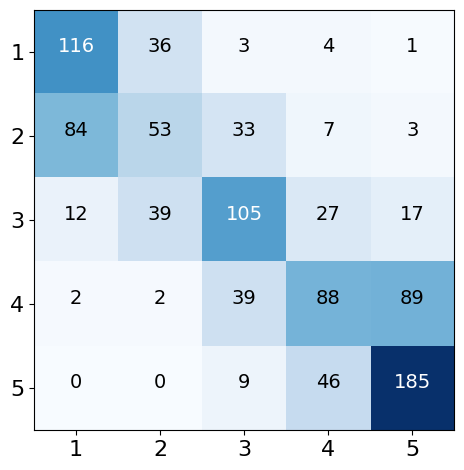

In [140]:
plot_confusion_matrix(cm, classes=[str(i) for i in range(1,6)], title='mDeBERTa V3')

## Arquitecturas RNN

### RNN

In [141]:
import numpy as np

In [142]:
results = json.load(open('../../models/classification/rnn_emb128_h256_l2_20251011_144608/test_results.json'))

In [143]:
print(f"F1-score: {results['test_metrics']['f1']:.4f}")
print(f"Accuracy: {results['test_metrics']['accuracy']:.4f}")

F1-score: 0.1397
Accuracy: 0.2290


In [144]:
get_metrics_from_cm(np.array(results['confusion_matrix']))

{'accuracy': 0.229,
 'f1_macro': 0.12587786393768355,
 'f1_weighted': 0.13966063547326404}

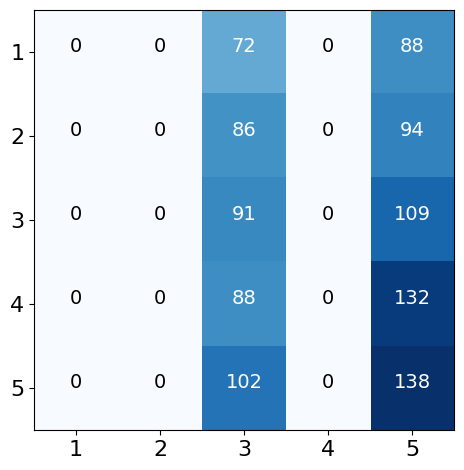

In [145]:
plot_confusion_matrix(np.array(results['confusion_matrix']), classes=[str(i) for i in range(1,6)], title='RNN')

### GRU

In [146]:
results = json.load(open('../../models/classification/gru_emb128_h256_l2_20251011_144253/test_results.json'))

In [147]:
print(f"F1-score: {results['test_metrics']['f1']:.4f}")
print(f"Accuracy: {results['test_metrics']['accuracy']:.4f}")

F1-score: 0.2787
Accuracy: 0.2810


In [148]:
get_metrics_from_cm(np.array(results['confusion_matrix']))

{'accuracy': 0.281,
 'f1_macro': 0.28097831194064116,
 'f1_weighted': 0.27870932140191773}

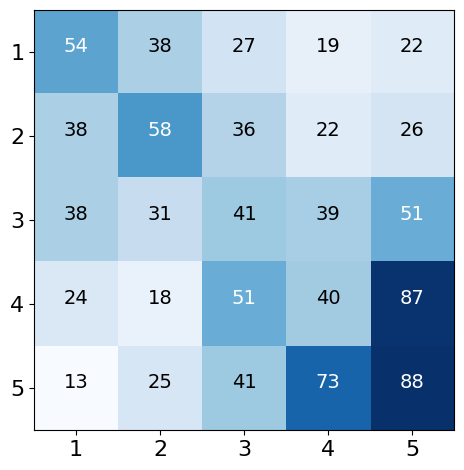

In [149]:
plot_confusion_matrix(np.array(results['confusion_matrix']), classes=[str(i) for i in range(1,6)], title='GRU')

### LSTM

In [150]:
results = json.load(open('../../models/classification/lstm_emb128_h256_l2_20251011_143940/test_results.json'))

In [151]:
print(f"F1-score: {results['test_metrics']['f1']:.4f}")
print(f"Accuracy: {results['test_metrics']['accuracy']:.4f}")

F1-score: 0.4173
Accuracy: 0.4130


In [152]:
get_metrics_from_cm(np.array(results['confusion_matrix']))

{'accuracy': 0.413,
 'f1_macro': 0.4118155667372786,
 'f1_weighted': 0.417253233258565}

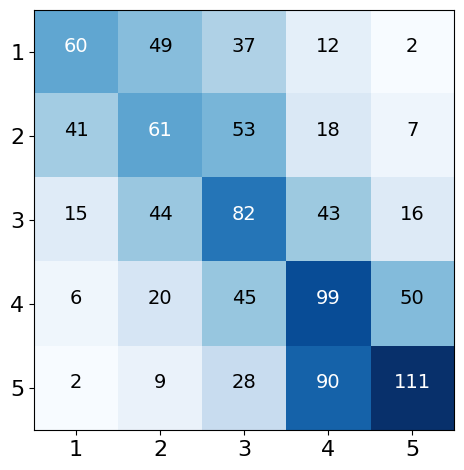

In [153]:
plot_confusion_matrix(np.array(results['confusion_matrix']), classes=[str(i) for i in range(1,6)], title='LSTM')

## CNN

In [154]:
results = json.load(open('../../models/classification/textcnn_emb128_f100_k3_4_5_20251011_180253/test_results.json'))

In [155]:
print(f"F1-score: {results['test_metrics']['f1']:.4f}")
print(f"Accuracy: {results['test_metrics']['accuracy']:.4f}")

F1-score: 0.4465
Accuracy: 0.4450


In [156]:
get_metrics_from_cm(np.array(results['confusion_matrix']))

{'accuracy': 0.445,
 'f1_macro': 0.44347425721393013,
 'f1_weighted': 0.4465209828224207}

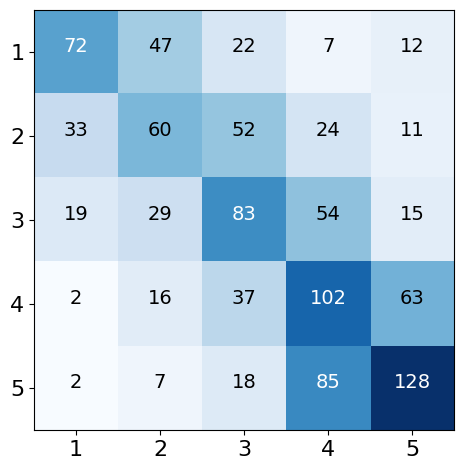

In [157]:
plot_confusion_matrix(np.array(results['confusion_matrix']), classes=[str(i) for i in range(1,6)], title='CNN')